In [ ]:
import numpy as np
from scipy.linalg import svd
from scipy.linalg import toeplitz
from PIL import Image
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

Blurred image shape: (1344, 1344)


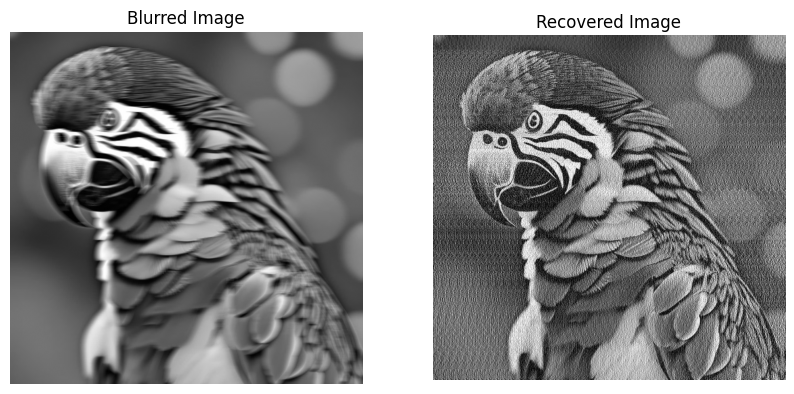

In [ ]:
# Step 1: Load blurred image
# Replace with your blurred image file
blurred_img = Image.open("parrot_motion_blurred.jpg").convert("L")  # grayscale
B = np.array(blurred_img, dtype=float)

m = B.shape[1]  # number of columns (width)
omega = 30  # blur length
n = m + omega - 1

print("Blurred image shape:", B.shape)

# -----------------------------
# Step 2: Construct blur matrix A using Toeplitz (formula 11-13)
# -----------------------------
c = np.zeros(m)
c[0] = 1 / omega  # first column
r = np.zeros(n)
r[:omega] = 1 / omega  # first row
A = toeplitz(c, r)  # Toeplitz matrix (m x n)

# -----------------------------
# Step 3: Compute pseudoinverse of A via SVD
# -----------------------------
U, S, Vt = svd(A)
tol = 1e-10
r_rank = np.sum(S > tol)

Sigma_plus = np.zeros((Vt.shape[0], U.shape[0]))
for i in range(r_rank):
    Sigma_plus[i, i] = 1.0 / S[i]

A_plus = Vt.T @ Sigma_plus @ U.T

# -----------------------------
# Step 4: Recover image using formula (14)
# X+ = B (A+)^T
# -----------------------------
X_plus = B @ A_plus.T

# -----------------------------
# Step 5: Display results
# -----------------------------
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(B, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.clip(X_plus, 0, 255), cmap="gray")
plt.title("Recovered Image")
plt.axis("off")

plt.show()